# Aula 9 - Filtros FIR - Parte 1
Versão 2023

Essas notas de aula podem ser compartilhadas nos termos da lincença Creative Commons CC BY-NC-ND 4.0, com propósitos exclusivamente educacionais.

Attribution-NonCommercial-NoDerivatives 4.0 International

##  FILTROS FIR
## - São os filtros digitais cuja resposta ao impulso é finita.

$ h[n] \neq 0: n=0,1,\dots,M-1 $


### - Função de Transferência $\Rightarrow$ somente numerador.
###    - A saída depende dos valores passados e presente da entrada.
### - Vantagens principais:
    1.  Impõem a Fase Linear,
    2.  São sempre estáveis (por causa do tamanho finito).
### - Desvantagem:
    1. Ordem muito alta.
## - Projetos:
    1. por janela,
    2. por amostragem em frequência.

## 1. *Toy example*

## Filtro de Média Móvel com coeficientes contantes 

## Equação: 

$y[n] = \frac{1}{N}\sum_{k=0}^{N-1}x[n-k] $


## Perguntas:
### 1. Essa equação de recorrência se comporta como um filtro?
### 2. Qual a sua largura de banda?
### 3. O valor de $N$ interfere na largura de banda?

## Equacionamento

## 1. $ y[n] = \frac{1}{N}\sum_{k=0}^{N-1}x[n-k] $

## 2. $ Y(z) = \frac{1}{N}\sum_{k=0}^{N-1} z^{-k}X(z) \to Y(e^{j\omega}) = \frac{1}{N}\sum_{k=0}^{N-1} e^{-j\omega k}X(e^{j\omega}) = \frac{X(e^{j\omega})}{N}\sum_{k=0}^{N-1} e^{-j\omega k} $

## 3. $ H(e^{j\omega}) = \frac{1}{N}\sum_{k=0}^{N-1} e^{-j\omega k} = \frac{1}{N}\frac{1-(e^{-j\omega})^N}{1 - e^{-j\omega}} $

## 4. $ H(e^{j\omega}) = \frac{1}{N}\frac{1-e^{-j\omega N}}{1 - e^{-j\omega}} = \frac{1}{N}\frac{e^{-j\omega N/2}}{e^{-j\omega}}\frac{(e^{j\omega N/2} - e^{-j\omega N/2})}{e^{j\omega/2} - e^{-j\omega/2}}$

## 5. $ H(e^{j\omega}) = \frac{1}{N}\frac{e^{-j\omega N/2}}{e^{-j\omega/2}}\frac{2j\sin(\omega N/2)} {2j\sin(\omega/2)} = \underbrace{e^{-j\omega (N-1)/2}}_{Fase}\underbrace{\frac{\sin(\omega N/2)} {N\sin(\omega/2)}}_{Módulo} $

## 6. $ |H(e^{j\omega})| = \frac{\sin(\omega N/2)} {N\sin(\omega/2)}$

## 7. $ \angle H(e^{j\omega}) = e^{-j\omega (N-1)/2}$ 

### 7.1 $ \;\;\;\;\;\; \theta(\omega) = -\omega (N-1)/2 $

### 7.2 $ \;\;\;\;\;\; \tau(\omega) = -\frac{d}{d\omega} \angle H(e^{j\omega}) = (N-1)/2 $

## 2. Caso Geral

## Um filtro FIR de ordem $M-1$ é descrito pela seguinte equação de diferenças:

$ y[n] = b_0x[n] + b_1x[n-1] + \cdots + b_{M-1}x[n-M+1] $

### $ = \sum_{k=0}^{M-1}b_kx[n-k] $

### Expressando a saída como a convolução da entrada com a resposta ao impulso $h[n]$ tem-se: 

### $ y[n] = \sum_{k=0}^{M-1}h[k]x[n-k] = \sum_{k=0}^{M-1}b_kx[n-k] $

### Observações:
1. os coeficientes do filtro correspondem à resposta ao impulso do filtro, isto é; $b_n = h[n]$;
2. $h[n]$ tem comprimento $M$, isto é:
3. $h[n] \neq 0 : n = 0,1, \dots, M-1$;
4. o filtro é sempre estável.

## Simulação: Toy Example

/tmp/ipykernel_10706/1899834218.py:10: RuntimeWarning: invalid value encountered in scalar divide
  H.append(np.abs(np.sin(np.pi*f*m)/(m*np.sin(np.pi*f))))


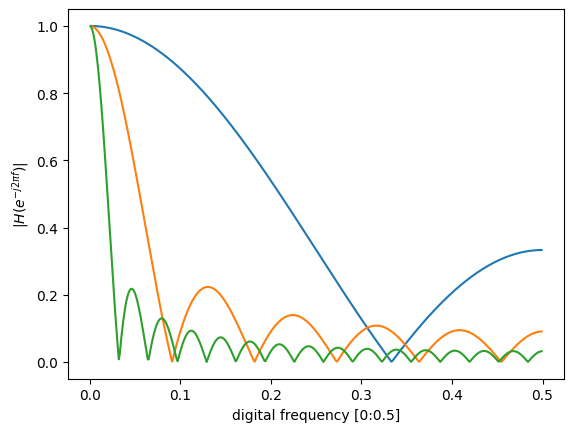

In [1]:
import numpy as np
import matplotlib.pylab as plt

M    = [3, 11, 31]
freq = np.arange(0,0.5, 0.001)

for m in M:
    H = []
    for f in freq:
        H.append(np.abs(np.sin(np.pi*f*m)/(m*np.sin(np.pi*f))))
    plt.plot(freq, H)
plt.xlabel('digital frequency [0:0.5]')
plt.ylabel('$|H(e^{-j 2\pi f})|$')
plt.show()

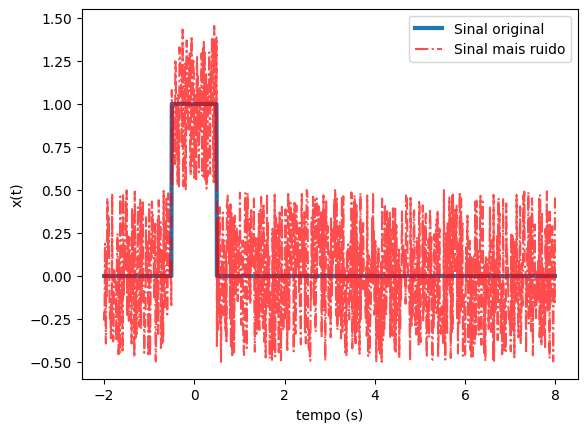

In [2]:
t = np.arange(-2, 8, 0.01)

def p(t):
    return 1 * (abs(t) < 0.5)

def x(t):
    if isinstance(t, np.floating):
        return np.random.random()
    else:
        return np.random.random(len(t))

plt.plot(t, p(t), linewidth=3, label='Sinal original') 
plt.plot(t, p(t)+x(t)-0.5, '-.r', alpha = 0.7, label = 'Sinal mais ruido')
plt.xlabel('tempo (s)')
plt.ylabel('x(t)')
plt.legend()
X = list(p(t)+x(t)-0.5)


In [7]:
#X = list(x(t))
M = 3
Y3 = [0] * M
for i in range(M, len(t)):
    y = 0
    for j in range(0, M-1):
        y = y + X[i-j]
    Y3.append(y/M)
    
#X = list(x(t))
M = 11
Y11 = [0] * M
for i in range(M, len(t)):
    y = 0
    for j in range(0, M-1):
        y = y + X[i-j]
    Y11.append(y/M)
    
#X = list(x(t))
M = 31
Y31 = [0] * M
for i in range(M, len(t)):
    y = 0
    for j in range(0, M-1):
        y = y + X[i-j]
    Y31.append(y/M)
    
#X = list(x(t))
M = 51
Y51 = [0] * M
for i in range(M, len(t)):
    y = 0
    for j in range(0, M-1):
        y = y + X[i-j]
    Y51.append(y/M)

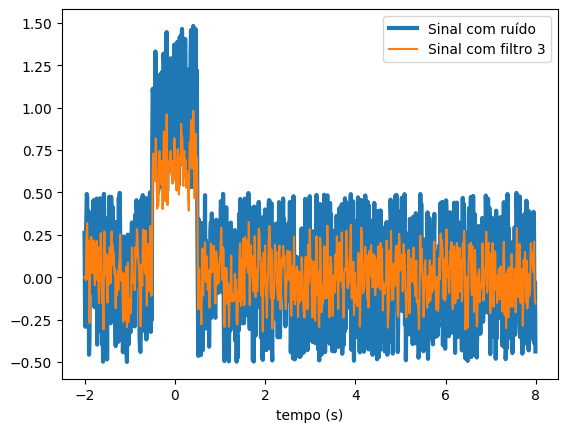

In [9]:
plt.plot(t, X,  linewidth=3, label='Sinal com ruído')
plt.plot(t, Y3, label='Sinal com filtro 3')
plt.xlabel('tempo (s)')
plt.legend()
plt.show()

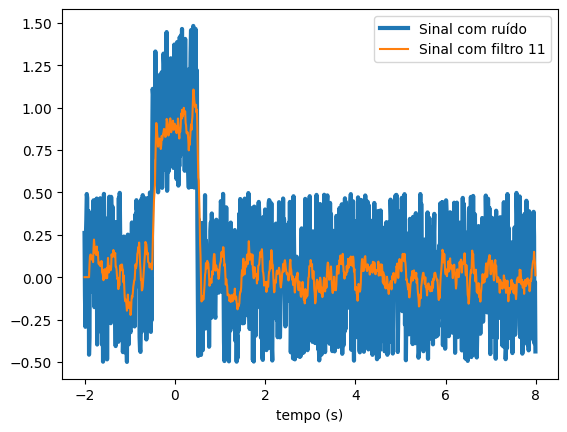

In [10]:
plt.plot(t, X,  linewidth=3, label='Sinal com ruído')
plt.plot(t, Y11, label='Sinal com filtro 11')
plt.xlabel('tempo (s)')
plt.legend()
plt.show()

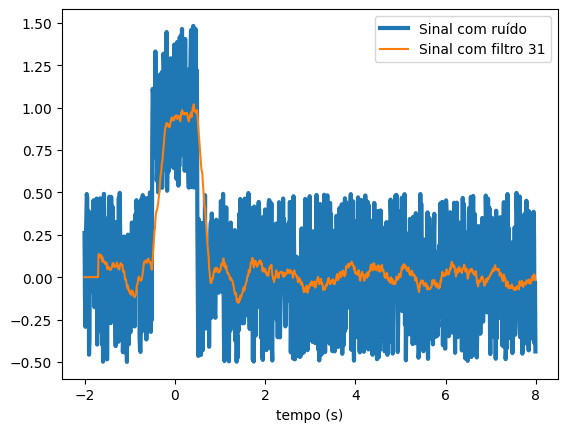

In [11]:
plt.plot(t, X,  linewidth=3, label='Sinal com ruído')
plt.plot(t, Y31, label='Sinal com filtro 31')
plt.xlabel('tempo (s)')
plt.legend()
plt.show()

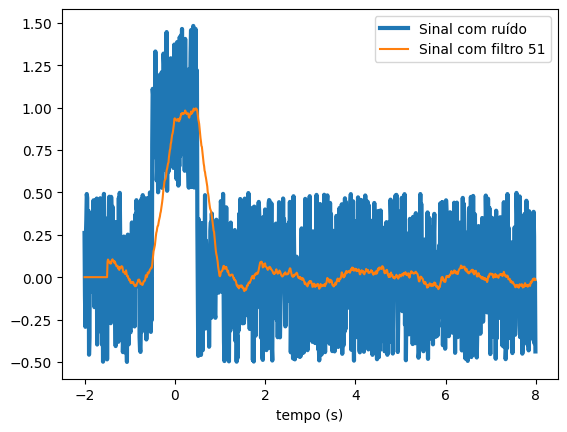

In [12]:
plt.plot(t, X,  linewidth=3, label='Sinal com ruído')
plt.plot(t, Y51, label='Sinal com filtro 51')
plt.xlabel('tempo (s)')
plt.legend()
plt.show()